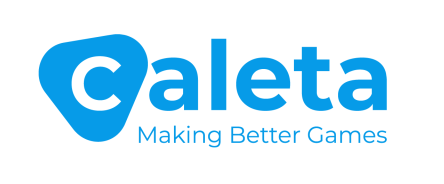

> **Recruitment test**

 **Job position: Junior Data Engineer**

## 1 
Write a SQL query to find the average GGR (Gross Game Revenue) from clients in the "clients" table, grouped by their operators. 

The "clients" table has the following columns:

* id (integer, primary key)
* name (string)
* operator (string)
* total_bet (float)
* total_won (float)

### Developed query

```sql
SELECT
	c1.operator AS operator,
	SUM(COALESCE(c1.total_bet, 0)) - SUM(COALESCE(c1.total_won, 0)) AS ggr
FROM
	clients c1
GROUP BY
	c1.operator;
```

> *The COALESCE function was used to avoid doing operations with null values causing loss of information.*

### Tests

In [1]:
import sqlite3

connection = sqlite3.connect('database')
cursor = connection.cursor()

In [2]:
# create table
cursor.execute(
  'CREATE TABLE clients (id INTEGER PRIMARY KEY, name TEXT, operator TEXT, total_bet REAL, total_won REAL)'
)
connection.commit()

In [3]:
# insert values

records = [(1, 'Bob', 'A1', 100, 20), 
           (2, 'Jon', 'A1', 150, 50), 
           (3, 'Bob', 'A2', 50, 10), 
           (4, 'Jon', 'A2', 200, 50)
          ]

cursor.executemany('INSERT INTO clients VALUES (?, ?, ?, ?, ?);', records)

connection.commit()

In [4]:
query_result = cursor.execute(
  '''
    SELECT
      *
    FROM
      clients;
  '''
).fetchall()

for row in query_result:
	print(row)
 
connection.commit()

(1, 'Bob', 'A1', 100.0, 20.0)
(2, 'Jon', 'A1', 150.0, 50.0)
(3, 'Bob', 'A2', 50.0, 10.0)
(4, 'Jon', 'A2', 200.0, 50.0)


In [5]:
query_result = cursor.execute(
  '''
    SELECT
      c1.operator AS operator,
      SUM(COALESCE(c1.total_bet, 0)) - SUM(COALESCE(c1.total_won, 0)) AS ggr
    FROM
      clients c1
    GROUP BY
      c1.operator;
  '''
).fetchall()

In [6]:
# Final result
for row in query_result:
	print(row)
 
connection.commit()

('A1', 180.0)
('A2', 190.0)


## 2
Given a Pandas DataFrame “df” representing game analytics data with columns “user_id”, “game_id”, “bet”, “won” and “timestamp”.

Write a Python function named “aggregate_game_data” that takes in the “df”
DataFrame and an integer “n” and returns a dictionary with the following structure:

```json
{
  "G1": {
  "max_bet": 100,
  "avg_bet": 75,
  "top_n_user_ids": ["A1", "A5", "A3"],
},
  "G2": {
  "max_bet": 200,
  "avg_bet": 150,
  "top_n_user_ids": ["A2", "A4", "A6"],
},
...
}
```

where the keys are the unique “game_ids”, and the values are dictionaries containing the following data:

* “max_bet”: the maximum bet amount of all users in the game_id
* “avg_bet”: the average bet amount of all users in the game_id rounded down to the nearest integer
* “top_n_user_ids”: a list of length n containing the user_id of the top n users with the highest bet amounts for each game_id, sorted in descending order by bet amount.

If “n” is greater than the number of users for a particular “game_id”, return all “user_ids” for that “game_id”.

**Created a dataframe to better visualize the problem.**

In [7]:
import pandas as pd

aux_dict = {
    'user_id': ['A1', 'A2', 'A3', 'A1', 'A2', 'A3'],
    'game_id': ['G1', 'G2', 'G3', 'G2', 'G3', 'G1'],
    'bet': [100, 150, 50, 200, 80, 120],
    'won': [20, 30, 5, 50, 10, 15],
    'timestamp': ['2023/01/20', '2023/01/19', '2023/01/15', '2023/01/25', '2023/01/21', '2023/01/18']
}

df = pd.DataFrame(data=aux_dict)

In [8]:
df.head(6)

,user_id,game_id,bet,won,timestamp
0,A1,G1,100,20,2023/01/20
1,A2,G2,150,30,2023/01/19
2,A3,G3,50,5,2023/01/15
3,A1,G2,200,50,2023/01/25
4,A2,G3,80,10,2023/01/21
5,A3,G1,120,15,2023/01/18


In [9]:
# max_bet
# df.groupby('game_id')['bet'].max()

In [10]:
# avg_bet
# df.groupby('game_id')['bet'].mean().round()

In [11]:
# top_users
# df.groupby(['game_id', 'user_id'])['bet'].max()

### Function developed

In [12]:
def aggregate_game_data(df: pd.DataFrame, n: int) :
  return_dict = {}
  max_bet_df = df.groupby('game_id')['bet'].max()
  avg_bet_df = df.groupby('game_id')['bet'].mean().round()
  top_users_df = df.groupby(['game_id', 'user_id'])['bet'].max()
  for game in df['game_id']:
    return_dict[game] = {
        'max_bet': float(max_bet_df[game]),
        'avg_bet': avg_bet_df[game],
        'top_n_user_ids': list(top_users_df[game].nlargest(n).keys())
    }
  return return_dict

In [13]:
## to pretty print
import json
result = aggregate_game_data(df, 2)

print(json.dumps(result, sort_keys=True, indent=2, default=str))

{
  "G1": {
    "avg_bet": 110.0,
    "max_bet": 120.0,
    "top_n_user_ids": [
      "A3",
      "A1"
    ]
  },
  "G2": {
    "avg_bet": 175.0,
    "max_bet": 200.0,
    "top_n_user_ids": [
      "A1",
      "A2"
    ]
  },
  "G3": {
    "avg_bet": 65.0,
    "max_bet": 80.0,
    "top_n_user_ids": [
      "A2",
      "A3"
    ]
  }
}


### Tests

In [14]:
# test with value of n greater than the number of players
assert result == aggregate_game_data(df, 3)
print('Same result with value of n greater than the number of players')

Same result with value of n greater than the number of players


In [15]:

# post-insertion update test
aux_dict_2 = {
    'user_id': 'A4',
    'game_id': 'G1',
    'bet': 300,
    'won': 100,
    'timestamp': '2023/01/26'
}

df2 = df.append(aux_dict_2, ignore_index=True)
result2 = aggregate_game_data(df2, 2)

assert result2['G1']['max_bet'] == 300
assert result2['G1']['avg_bet'] == 173
assert result2['G1']['top_n_user_ids'] == ['A4', 'A3']

print("Values updated after insertion.")

Values updated after insertion.


## 3 
Given a table "game_plays" with the following columns:
* round_id (primary key, integer)
* player_id (integer)
* game_id (integer)
* play_date (date)
* bet (float)

and a table "players" with the following columns:
* player_id (primary key, integer)
* player_name (string)
* registration_date (date)

Write a SQL query that returns the top 10 players by bet (“bet”), ordered by “bet” in descending order, for game plays in the month of January 2022. The result should have the following columns:
* player_name (string)
* total_bet (float)

### Developed query

```sql
SELECT
	p.player_name AS player_name,
	g.bet AS bet
FROM
	game_plays g
JOIN players p ON
	g.player_id = p.id
WHERE
	g.play_date BETWEEN '2023-01-01' AND '2023-01-31'
ORDER BY
	g.bet DESC
LIMIT 10;
```

### Tests


**The 2 mentioned tables were created and data was inserted to verify the operation of the query.**

In [16]:
# create tables
cursor.execute(
  'CREATE TABLE game_plays (round_id INTEGER PRIMARY KEY, player_id INTEGER, game_id INTEGER, play_date DATETIME, bet REAL)'
)

cursor.execute(
  'CREATE TABLE players (player_id INTEGER PRIMARY KEY, player_name TEXT, registration_date DATETIME)'
)
connection.commit()

In [17]:
# insert values

records = [   
  (1, 1, 1, '2023-01-10', 100),
  (2, 2, 1, '2023-01-12', 200),
  (3, 1, 2, '2023-01-11', 150),
  (4, 2, 2, '2023-01-13', 100),
  (5, 2, 1, '2023-01-03',  50),
  (6, 3, 1, '2023-01-15', 300),
  (7, 2, 2, '2023-01-24', 500),
  (8, 3, 2, '2023-01-20', 250),
  (9, 4, 1, '2023-01-03', 320),
  (10, 5, 1, '2023-01-15', 160),
  (11, 6, 2, '2023-01-24',  80),
  (12, 4, 2, '2023-01-20', 410)
]

cursor.executemany('INSERT INTO game_plays VALUES (?, ?, ?, ?, ?);', records)

connection.commit()

In [18]:
# insert values
records = [   
  (1, 'Bob', '2023-01-05'),
  (2, 'Jon', '2023-01-04'),
  (3, 'Bob2', '2023-01-01'),
  (4, 'Jon2', '2023-01-02'),
  (5, 'Bob3', '2023-01-03',),
  (6, 'Jon3', '2023-01-02')
]

cursor.executemany('INSERT INTO players VALUES (?, ?, ?);', records)

connection.commit()

In [19]:
query_result = cursor.execute(
  '''
    SELECT
      *
    FROM
      game_plays;
  '''
).fetchall()

for row in query_result:
	print(row)
 
print('==================')
query_result = cursor.execute(
  '''
    SELECT
      *
    FROM
      players;
  '''
).fetchall()

for row in query_result:
	print(row)
 
connection.commit()

(1, 1, 1, '2023-01-10', 100.0)
(2, 2, 1, '2023-01-12', 200.0)
(3, 1, 2, '2023-01-11', 150.0)
(4, 2, 2, '2023-01-13', 100.0)
(5, 2, 1, '2023-01-03', 50.0)
(6, 3, 1, '2023-01-15', 300.0)
(7, 2, 2, '2023-01-24', 500.0)
(8, 3, 2, '2023-01-20', 250.0)
(9, 4, 1, '2023-01-03', 320.0)
(10, 5, 1, '2023-01-15', 160.0)
(11, 6, 2, '2023-01-24', 80.0)
(12, 4, 2, '2023-01-20', 410.0)
(1, 'Bob', '2023-01-05')
(2, 'Jon', '2023-01-04')
(3, 'Bob2', '2023-01-01')
(4, 'Jon2', '2023-01-02')
(5, 'Bob3', '2023-01-03')
(6, 'Jon3', '2023-01-02')


In [20]:
query_result = cursor.execute(
  '''
  SELECT
    p.player_name AS player_name,
    g.bet AS bet
  FROM
    game_plays g
  JOIN players p ON
    g.player_id = p.player_id
  WHERE
    g.play_date BETWEEN '2023-01-01' AND '2023-01-31'
  ORDER BY
    g.bet DESC
  LIMIT 10;
  '''
).fetchall()

In [21]:
# Final result
for row in query_result:
	print(row)
 
connection.commit()

('Jon', 500.0)
('Jon2', 410.0)
('Jon2', 320.0)
('Bob2', 300.0)
('Bob2', 250.0)
('Jon', 200.0)
('Bob3', 160.0)
('Bob', 150.0)
('Bob', 100.0)
('Jon', 100.0)


In [22]:
cursor.close()
connection.close()

##4 (OPTIONAL) 
Write a Python function that scrapes data about games from the webpage https://clashofslots.com/best-online-slots/ and outputs a CSV file containing the fields:
* Software provider (string)
* Release Date (date_column)
* RTP (float)
* Max Win (integer)
* Volatility (string)
* Features (string)

Note: You can use any library you want (e.g. BeautifulSoup, Requests, etc.).

> **No need to save game name?**

### Developed functions

In [23]:
import requests
from bs4 import BeautifulSoup
import re

URL = "https://clashofslots.com/best-online-slots/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

top_rating_year_list = soup.find_all('div', class_="slots_top_rating_year_item slots_top_rating_global_item d-flex")
# print(top_rating_year_list[0].prettify())

In [24]:
# slots_top_rating_year_item_title
# print(top_rating_year_list[0].find(class_='slots_top_rating_year_item_title').text.strip())

In [25]:
# function to get the providers and release date from the class "slots_top_rating_year_item_release_soft"
def get_provider_and_date(index):
  provider = [re.sub(r"\s+", " ", x).strip() for x in top_rating_year_list[index].find(class_='slots_top_rating_year_item_release_soft').text.split(',')][1:]
  release_date = [re.sub(r"\s+", " ", x).strip() for x in top_rating_year_list[index].find(class_='slots_top_rating_year_item_release_soft').text.split(',')][0]
  # print(provider)
  # print(release_date)
  return provider, release_date

In [26]:
# function do get the details (RTP, Maw Wins and Volatility) from the class "slots_top_rating_year_item_details"
def get_details(index):
  details = top_rating_year_list[index].find(class_='slots_top_rating_year_item_details').text.strip().split(',')

  rtp = float(details[0].split(':')[1].strip()[:-1])
  # print(rtp)
  max = int(details[1].split(':')[1].strip()[1:])
  # print(max)
  volatility = str(details[2].split(':')[1].strip())
  # print(volatility)

  return rtp, max, volatility

In [27]:
# function do get the features from the class "slots_top_rating_year_item_features"
def get_features(index):
  features = top_rating_year_list[index].find(class_='slots_top_rating_year_item_features').text.strip().split(',')
  features[0] = features[0].split(':')[1].strip()
  # print(features)
  return features

In [28]:
# dictionary to save the informations
result_dict = {}

# iterating over the list of games 
for index, item in enumerate(top_rating_year_list):

  # game name
  game = str(top_rating_year_list[index].find(class_='slots_top_rating_year_item_title').text.strip())
  
  provider, release_date = get_provider_and_date(index)
  rtp, max, volatility = get_details(index)
  features = get_features(index)

  result_dict[game] = {
    'Software provider': ' / '.join(provider) ,
    'Release Date': release_date,
    'RTP': rtp,
    'Max Win': max,
    'Volatility': volatility,
    'Features': ' / '.join(features)
  }

# print(json.dumps(result_dict, indent=2, default=str))

In [29]:
import csv

# save the csv file on Colab files
with open('result.csv', 'w') as f:
  fieldnames = list(result_dict.items())[0][1].keys()
  writer = csv.DictWriter(f, fieldnames=fieldnames)
  writer.writeheader()
  for item in result_dict:
    writer.writerow(result_dict[item])

### Result

> **If using Google Colab the csv file is available in the files section on the left.**